In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = sns.load_dataset("titanic")
print(titanic_df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [3]:
# To change the Column names
titanic_df = titanic_df.rename(columns = {
    'pclass':'ticket_class',
    'ticker' : 'ticker_number',
    'cabin' : 'cabin_number',
})

In [4]:
# Replace the values
titanic_df["embarked"].replace({
    "C": "Cherbourg",
    "Q": "Queenstown",
    "S" : "Southampton"
}, inplace=True)

In [5]:
titanic_df.isnull().sum()

survived          0
ticket_class      0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
who               0
adult_male        0
deck            688
embark_town       2
alive             0
alone             0
dtype: int64

In [6]:
titanic_df

,survived,ticket_class,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,Cherbourg,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Southampton,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,Southampton,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Southampton,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,Southampton,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,Southampton,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,Cherbourg,First,man,True,C,Cherbourg,yes,True


In [7]:
# Removing all rows which are having missing values.
titanic_df.dropna()

# Removing only that rows where entire columns have missing values.
titanic_df.dropna(how="all")

# Remove columns with any null values
titanic_cd = titanic_df.dropna(axis=1)

In [8]:
#filling missing values with backward fil
df2 = titanic_df.fillna(method='bfill')
print(df2)

# filling missing values using forward fill
df1 =  titnaic_df.fillna(method='ffill')
print(df1)

#filling missing values using mean
titanic_df.age = titanic_df.age.fillna(titanic_df.age.mean())

#filling missing values using mode
titanic_df.ticket_class = titanic_df.ticker_class.fillna(titanic_df.ticker_class.mode()[0])



     survived  ticket_class     sex   age  sibsp  parch     fare     embarked  \
0           0             3    male  22.0      1      0   7.2500  Southampton   
1           1             1  female  38.0      1      0  71.2833    Cherbourg   
2           1             3  female  26.0      0      0   7.9250  Southampton   
3           1             1  female  35.0      1      0  53.1000  Southampton   
4           0             3    male  35.0      0      0   8.0500  Southampton   
..        ...           ...     ...   ...    ...    ...      ...          ...   
886         0             2    male  27.0      0      0  13.0000  Southampton   
887         1             1  female  19.0      0      0  30.0000  Southampton   
888         0             3  female  26.0      1      2  23.4500  Southampton   
889         1             1    male  26.0      0      0  30.0000    Cherbourg   
890         0             3    male  32.0      0      0   7.7500   Queenstown   

      class    who  adult_m

NameError: name 'titnaic_df' is not defined

C:\Users\SHAIK JULFEEN AHMADH\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\SHAIK JULFEEN AHMADH\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\SHAIK JULFEEN AHMADH\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\SHAIK JULFEEN AHMADH\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\SHAIK JULFEEN AHMADH\anaconda3\lib\site

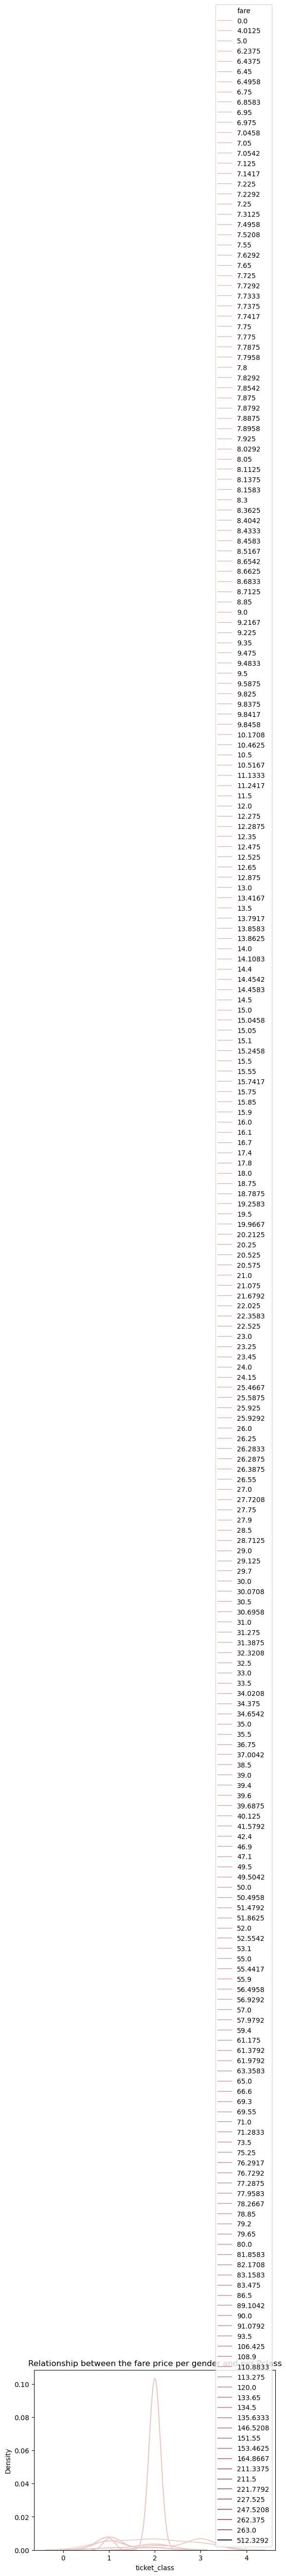

In [9]:
sns.kdeplot(x='ticket_class', hue='fare', data=titanic_df).set(
    title="Relationship between the fare price per gender and per Pclass",
)

plt.show()

In [ ]:
sns.barplot(x='ticket_class',y='fare',data= titanic_df)

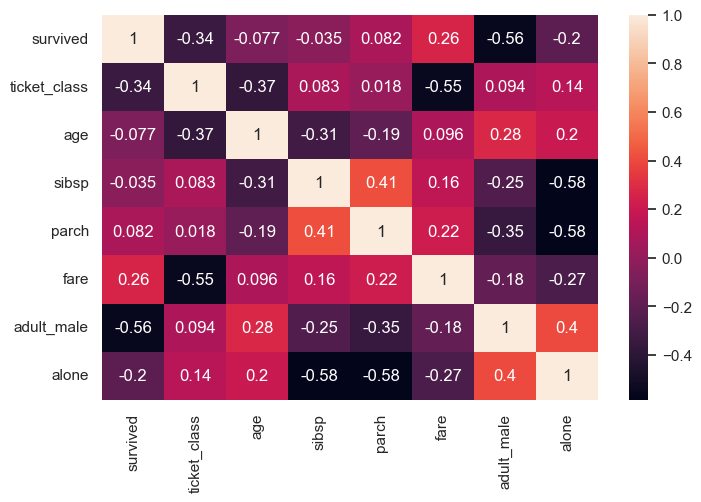

,survived,ticket_class,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
ticket_class,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [10]:
titanic_hm= titanic_df.corr()

sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(titanic_hm, annot=True, cmap='rocket')
plt.show()

#
titanic_corr=titanic_df.corr()
titanic_corr